In [483]:
import sklearn 
import pandas as pd

import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [484]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

### Data Preparation

In [485]:
df_train = pd.read_csv(r'C:\Users\ASUS\NLP Learning\assignment1\train.csv',sep=',')
df_test = df_test = pd.read_csv(r'C:\Users\ASUS\NLP Learning\assignment1\test.csv',sep=',')

# drop column Id
df_train.drop('Id', axis=1, inplace=True)
df_test.drop('Id', axis=1, inplace=True)

In [516]:
display(df_train.isnull().sum().sort_values(axis=0))

MSSubClass       0
GarageCars       0
GarageFinish     0
GarageYrBlt      0
GarageType       0
FireplaceQu      0
Fireplaces       0
Functional       0
TotRmsAbvGrd     0
KitchenQual      0
KitchenAbvGr     0
BedroomAbvGr     0
HalfBath         0
FullBath         0
BsmtHalfBath     0
BsmtFullBath     0
GrLivArea        0
LowQualFinSF     0
GarageArea       0
GarageQual       0
GarageCond       0
PavedDrive       0
houseAge         0
totalBathroom    0
totalSqFeet      0
SalePrice        0
SaleCondition    0
SaleType         0
YrSold           0
MoSold           0
2ndFlrSF         0
MiscVal          0
Fence            0
PoolQC           0
PoolArea         0
ScreenPorch      0
3SsnPorch        0
EnclosedPorch    0
OpenPorchSF      0
WoodDeckSF       0
MiscFeature      0
reModeled        0
1stFlrSF         0
CentralAir       0
OverallCond      0
OverallQual      0
HouseStyle       0
BldgType         0
Condition2       0
Condition1       0
Neighborhood     0
LandSlope        0
LotConfig   

### Remove NaN value

In [487]:
from sklearn.impute import SimpleImputer
# Group 1:
group_1 = [
    'PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'GarageType',
    'GarageFinish', 'GarageQual', 'GarageCond', 'BsmtQual', 'BsmtCond',
    'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'MasVnrType'
]
df_train[group_1] = df_train[group_1].fillna("None")

# Group 2:
group_2 = [
    'GarageArea', 'GarageCars', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
    'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'MasVnrArea'
]

df_train[group_2] = df_train[group_2].fillna(0)

# Group 3:
group_3a = [
    'Functional', 'MSZoning', 'Electrical', 'KitchenQual', 'Exterior1st',
    'Exterior2nd', 'SaleType', 'Utilities'
]

imputer = SimpleImputer(strategy='most_frequent')
df_train[group_3a] = pd.DataFrame(imputer.fit_transform(df_train[group_3a]), index=df_train.index)

df_train.LotFrontage = df_train.LotFrontage.fillna(df_train.LotFrontage.mean())
df_train.GarageYrBlt = df_train.GarageYrBlt.fillna(df_train.YearBuilt)

In [488]:
# check if still have missing value
df_train.isnull().sum().sum()

0

### Remove outliers

In [517]:
outlier_index = df_train[(df_train.GrLivArea > 4000)
                           & (df_train.SalePrice < 200000)].index
df_train.drop(outlier_index, inplace=True)

### Adding new feature 

In [518]:
df_train['totalSqFeet'] = df_train['TotalBsmtSF'] + df_train['1stFlrSF'] + df_train['2ndFlrSF']
df_train['totalBathroom'] = df_train.FullBath + df_train.BsmtFullBath + 0.5 * (df_train.HalfBath + df_train.BsmtHalfBath)
df_train['houseAge'] = df_train.YrSold - df_train.YearBuilt
df_train['reModeled'] = np.where(df_train.YearRemodAdd == df_train.YearBuilt, 0, 1)
df_train['isNew'] = np.where(df_train.YrSold == df_train.YearBuilt, 1, 0)

### Transform Categorical Data

In [519]:
# remove the categorical cata
data_vars = df_train.columns.values.tolist()
to_keep = [i for i in data_vars if i not in cat_vars] 

df_train_transformed = df_train[to_keep]

In [520]:
df_train_transformed

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,totalSqFeet,totalBathroom,houseAge,reModeled,isNew
0,60,65.000000,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500,2566,3.5,5,0,0
1,20,80.000000,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500,2524,2.5,31,0,0
2,60,68.000000,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500,2706,3.5,7,1,0
3,70,60.000000,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000,2473,2.0,91,1,0
4,60,84.000000,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000,3343,3.5,8,0,0
5,50,85.000000,14115,5,5,1993,1995,0.0,732,0,64,796,796,566,0,1362,1,0,1,1,1,1,5,0,1993.0,2,480,40,30,0,320,0,0,700,10,2009,143000,2158,2.5,16,1,0
6,20,75.000000,10084,8,5,2004,2005,186.0,1369,0,317,1686,1694,0,0,1694,1,0,2,0,3,1,7,1,2004.0,2,636,255,57,0,0,0,0,0,8,2007,307000,3380,3.0,3,1,0
7,60,70.049958,10382,7,6,1973,1973,240.0,859,32,216,1107,1107,983,0,2090,1,0,2,1,3,1,7,2,1973.0,2,484,235,204,228,0,0,0,350,11,2009,200000,3197,3.5,36,0,0
8,50,51.000000,6120,7,5,1931,1950,0.0,0,0,952,952,1022,752,0,1774,0,0,2,0,2,2,8,2,1931.0,2,468,90,0,205,0,0,0,0,4,2008,129900,2726,2.0,77,1,0
9,190,50.000000,7420,5,6,1939,1950,0.0,851,0,140,991,1077,0,0,1077,1,0,1,0,2,2,5,2,1939.0,1,205,0,4,0,0,0,0,0,1,2008,118000,2068,2.0,69,1,0


In [521]:
correlation_matrix = df_train_transformed.corr().abs()
target_feature = 'SalePrice'
correlation_values = correlation_matrix[target_feature]

In [522]:
correlation_values.sort_values(axis=0) 

BsmtFinSF2       0.011422
BsmtHalfBath     0.016881
MiscVal          0.021203
reModeled        0.022155
LowQualFinSF     0.025625
YrSold           0.028882
3SsnPorch        0.044568
MoSold           0.046124
OverallCond      0.077948
MSSubClass       0.084276
PoolArea         0.099490
ScreenPorch      0.111415
EnclosedPorch    0.128646
KitchenAbvGr     0.135946
BedroomAbvGr     0.168245
BsmtUnfSF        0.214460
BsmtFullBath     0.228459
isNew            0.228954
LotArea          0.268179
HalfBath         0.284590
2ndFlrSF         0.320532
OpenPorchSF      0.321142
WoodDeckSF       0.324758
LotFrontage      0.352798
BsmtFinSF1       0.409384
Fireplaces       0.469862
MasVnrArea       0.477810
YearRemodAdd     0.507717
GarageYrBlt      0.508719
YearBuilt        0.523608
houseAge         0.524067
TotRmsAbvGrd     0.537769
FullBath         0.562165
GarageArea       0.629217
1stFlrSF         0.631530
totalBathroom    0.635896
GarageCars       0.641047
TotalBsmtSF      0.651153
GrLivArea   

In [523]:
columns_to_drop = correlation_values[correlation_values < 0.5].index
df_train_final = df_train_transformed.drop(columns_to_drop,axis=1)

### Plotting stage

In [524]:
print(df_train_final.describe())

       OverallQual    YearBuilt  YearRemodAdd  TotalBsmtSF     1stFlrSF  \
count  1458.000000  1458.000000   1458.000000  1458.000000  1458.000000   
mean      6.093964  1971.218107   1984.834019  1052.537037  1158.851166   
std       1.376369    30.193754     20.641760   414.982320   372.039498   
min       1.000000  1872.000000   1950.000000     0.000000   334.000000   
25%       5.000000  1954.000000   1967.000000   795.250000   882.000000   
50%       6.000000  1972.500000   1994.000000   991.000000  1086.000000   
75%       7.000000  2000.000000   2004.000000  1296.750000  1390.750000   
max      10.000000  2010.000000   2010.000000  3206.000000  3228.000000   

         GrLivArea     FullBath  TotRmsAbvGrd  GarageYrBlt   GarageCars  \
count  1458.000000  1458.000000   1458.000000  1458.000000  1458.000000   
mean   1510.465706     1.563786      6.510974  1976.465021     1.766118   
std     507.878508     0.549891      1.615880    26.299692     0.747104   
min     334.000000     0

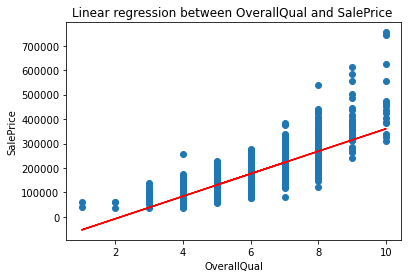

In [525]:
reg = np.polyfit(df_train_final['OverallQual'],df_train_final['SalePrice'],deg=1)
trend = np.polyval(reg,df_train_final['OverallQual'])
plt.scatter(df_train_final['OverallQual'],df_train_final['SalePrice'])
plt.plot(df_train_final['OverallQual'],trend,'r')
plt.title("Linear regression between OverallQual and SalePrice ")
plt.xlabel("OverallQual")
plt.ylabel("SalePrice")
plt.show();

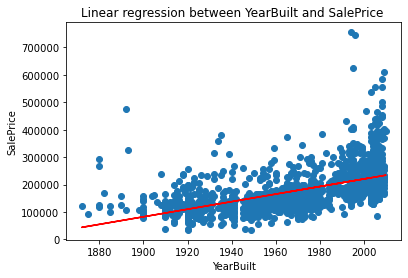

In [526]:
reg = np.polyfit(df_train_final['YearBuilt'],df_train_final['SalePrice'],deg=1)
trend = np.polyval(reg,df_train_final['YearBuilt'])
plt.scatter(df_train_final['YearBuilt'],df_train_final['SalePrice'])
plt.plot(df_train_final['YearBuilt'],trend,'r')
plt.title("Linear regression between YearBuilt and SalePrice ")
plt.xlabel("YearBuilt")
plt.ylabel("SalePrice")
plt.show();

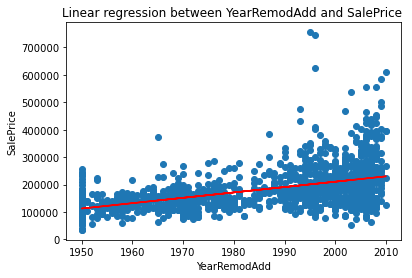

In [527]:
reg = np.polyfit(df_train_final['YearRemodAdd'],df_train_final['SalePrice'],deg=1)
trend = np.polyval(reg,df_train_final['YearRemodAdd'])
plt.scatter(df_train_final['YearRemodAdd'],df_train_final['SalePrice'])
plt.plot(df_train_final['YearRemodAdd'],trend,'r')
plt.title("Linear regression between YearRemodAdd and SalePrice ")
plt.xlabel("YearRemodAdd")
plt.ylabel("SalePrice")
plt.show();

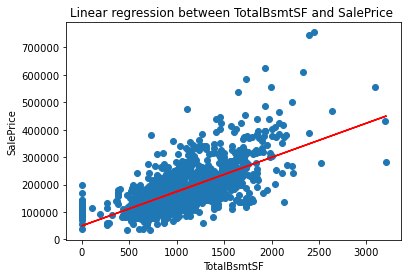

In [528]:
reg = np.polyfit(df_train_final['TotalBsmtSF'],df_train_final['SalePrice'],deg=1)
trend = np.polyval(reg,df_train_final['TotalBsmtSF'])
plt.scatter(df_train_final['TotalBsmtSF'],df_train_final['SalePrice'])
plt.plot(df_train_final['TotalBsmtSF'],trend,'r')
plt.title("Linear regression between TotalBsmtSF and SalePrice ")
plt.xlabel("TotalBsmtSF")
plt.ylabel("SalePrice")
plt.show();

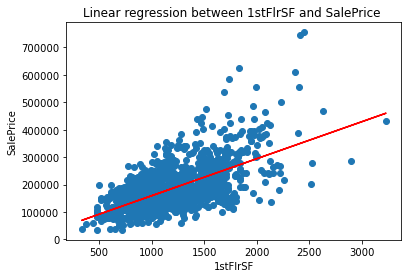

In [529]:
reg = np.polyfit(df_train_final['1stFlrSF'],df_train_final['SalePrice'],deg=1)
trend = np.polyval(reg,df_train_final['1stFlrSF'])
plt.scatter(df_train_final['1stFlrSF'],df_train_final['SalePrice'])
plt.plot(df_train_final['1stFlrSF'],trend,'r')
plt.title("Linear regression between 1stFlrSF and SalePrice ")
plt.xlabel("1stFlrSF")
plt.ylabel("SalePrice")
plt.show();

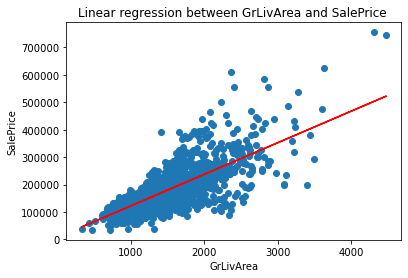

In [530]:
reg = np.polyfit(df_train_final['GrLivArea'],df_train_final['SalePrice'],deg=1)
trend = np.polyval(reg,df_train_final['GrLivArea'])
plt.scatter(df_train_final['GrLivArea'],df_train_final['SalePrice'])
plt.plot(df_train_final['GrLivArea'],trend,'r')
plt.title("Linear regression between GrLivArea and SalePrice ")
plt.xlabel("GrLivArea")
plt.ylabel("SalePrice")
plt.show();

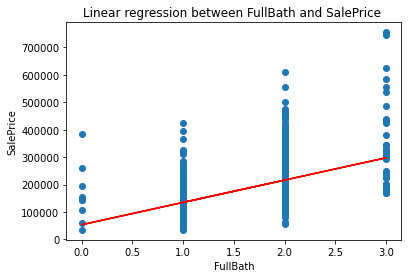

In [531]:
reg = np.polyfit(df_train_final['FullBath'],df_train_final['SalePrice'],deg=1)
trend = np.polyval(reg,df_train_final['FullBath'])
plt.scatter(df_train_final['FullBath'],df_train_final['SalePrice'])
plt.plot(df_train_final['FullBath'],trend,'r')
plt.title("Linear regression between FullBath and SalePrice ")
plt.xlabel("FullBath")
plt.ylabel("SalePrice")
plt.show();

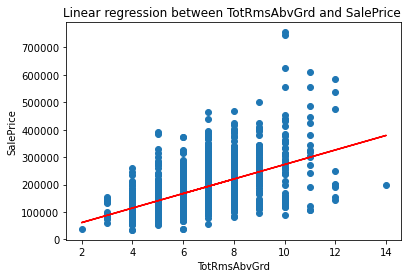

In [532]:
reg = np.polyfit(df_train_final['TotRmsAbvGrd'],df_train_final['SalePrice'],deg=1)
trend = np.polyval(reg,df_train_final['TotRmsAbvGrd'])
plt.scatter(df_train_final['TotRmsAbvGrd'],df_train_final['SalePrice'])
plt.plot(df_train_final['TotRmsAbvGrd'],trend,'r')
plt.title("Linear regression between TotRmsAbvGrd and SalePrice ")
plt.xlabel("TotRmsAbvGrd")
plt.ylabel("SalePrice")
plt.show();

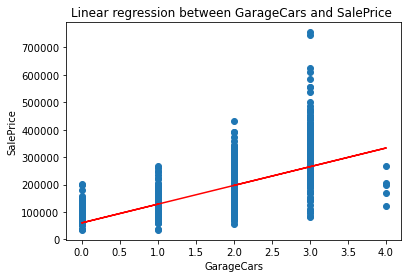

In [533]:
reg = np.polyfit(df_train_final['GarageCars'],df_train_final['SalePrice'],deg=1)
trend = np.polyval(reg,df_train_final['GarageCars'])
plt.scatter(df_train_final['GarageCars'],df_train_final['SalePrice'])
plt.plot(df_train_final['GarageCars'],trend,'r')
plt.title("Linear regression between GarageCars and SalePrice ")
plt.xlabel("GarageCars")
plt.ylabel("SalePrice")
plt.show();

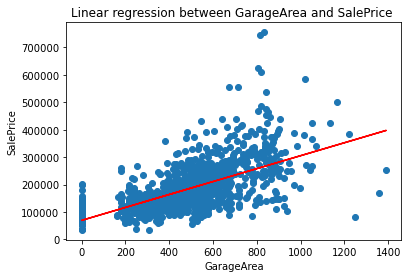

In [534]:
reg = np.polyfit(df_train_final['GarageArea'],df_train_final['SalePrice'],deg=1)
trend = np.polyval(reg,df_train_final['GarageArea'])
plt.scatter(df_train_final['GarageArea'],df_train_final['SalePrice'])
plt.plot(df_train_final['GarageArea'],trend,'r')
plt.title("Linear regression between GarageArea and SalePrice ")
plt.xlabel("GarageArea")
plt.ylabel("SalePrice")
plt.show();

### Split data into Feature and Target Variable

In [535]:
from sklearn.model_selection import train_test_split

In [536]:
x = df_train_final.drop('SalePrice', axis=1)
y = df_train_final['SalePrice']

#handling outliers

outlier_index = df_train[(df_train.GrLivArea > 4000)
                          & (df_train.SalePrice < 200000)].index
x.drop(outlier_index, axis=0, inplace=True)
y.drop(outlier_index, axis=0, inplace=True)

feature_train = x.columns.tolist()

In [537]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state = 3)

In [538]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1020, 14), (438, 14), (1020,), (438,))

### Data Modeling

In [539]:
from sklearn.linear_model import LinearRegression
from math import sqrt

In [540]:
model_linreg = LinearRegression()
model_linreg.fit(x_train,y_train)

LinearRegression()

### Model Evalutation

In [541]:
#Evaluate Model
from sklearn.metrics import accuracy_score,precision_score,confusion_matrix,f1_score,classification_report

In [542]:
y_test_pred = model_linreg.predict(x_test)

In [543]:
print(f"MAE:{mean_absolute_error(y_test,y_test_pred)}")
print(f"MSE:{mean_squared_error(y_test,y_test_pred)}")
print(f"RMSE:{sqrt(mean_squared_error(y_test,y_test_pred))}")
print(f"R^2:{r2_score(y_test,y_test_pred)}")

MAE:22451.61735337283
MSE:1004527340.1565673
RMSE:31694.27929700512
R^2:0.8328370255243193
